In [1]:
from bin.deepBind_functions import *
from Bio import SeqIO
from dna_features_viewer import GraphicFeature, GraphicRecord

In [2]:
# TFBS SEQ
SF1 = 'AGGCCAGGT'
SOX9 = 'CAACAATGG'
SRY = 'CTAAACAAA'

# SEQ ID
WT_SEQ = 'chren13_WT'
DEL_SEQ = 'chren13_3bp_DEL'

# deepBind output files
SOX9_FILE = 'data/SOX9_en13_seq_win_16_shift_8.tsv'
GATA4_FILE = 'data/GATA4_en13_seq_win_16_shift_8.tsv'
AR_FILE = 'data/AR_en13_seq_win_16_shift_8.tsv'

In [3]:
sequence_dict = SeqIO.to_dict(SeqIO.parse('data/en13_seq.fa', format='fasta'))
bs_dict = {'SOX9 bs': SOX9,'SRY bs' : SRY, 'SF1 bs': SF1, 'GATA4': 'GATA'}
bs_col = 'binding_site'
bs_label_df = get_binding_site_label_df(deepBind_score_df(WT_SEQ,sequence_dict, SOX9_FILE ),bs_dict,bs_col)
features  = plot_get_bs_feature(bs_label_df, bs_col, bs_dict)

# Introduction

This Jupyter notebook will explore the use of the "deepBind" model on enhancer13. <br> I will present the data being used, the input and output of the model, as well as the graphical results it produces.

## Data - Enhancer13

Within a 5.2 kb genomic segment lies Enhancer 13, or eSR-A, a vital player in the orchestration of sexual development. It exclusively exerts its influence in human embryonic testes but remains dormant in ovaries. eSR-A's core, a 1514 bp fragment packed with SOX9 and SF1 binding sites, activates vigorously when exposed to SF1 and SOX9. <br>

This enhancer's significance transcends humans, with a parallel counterpart, Enh13, discovered in mice. In mice, Enh13 deletion leads to complete sex reversal in XY individuals.  <br>

The stakes are high for eSR-A, as its deletion in humans results in 46,XY sex reversal, and duplication leads to 46,XX (ovo) testicular disorders of sexual development. This discovery underscores the intricate regulation of genes like SOX9 in sexual development and highlights its conservation and critical role in human and mouse biology.

## segment of Enhancer 13:



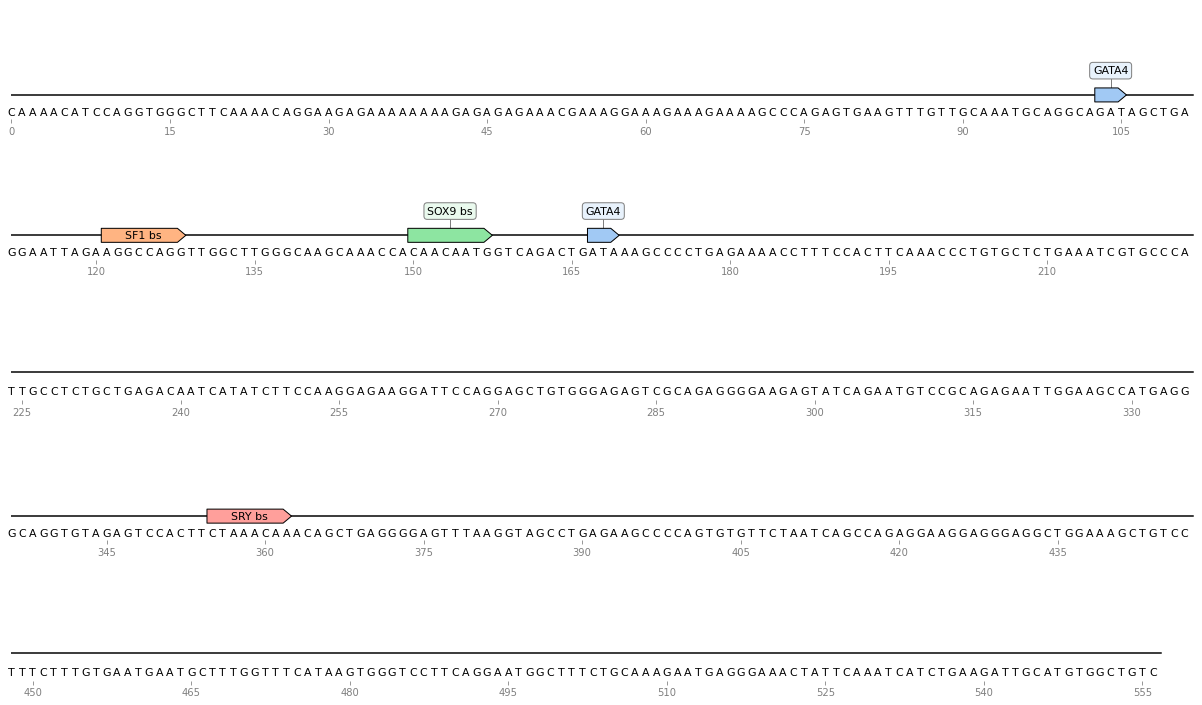

In [4]:
enh13 = GraphicRecord(sequence=sequence_dict[WT_SEQ], features=features)
all_enh = enh13.plot_on_multiple_lines(n_lines=5, nucl_per_line=500, plot_sequence=True)

## Model Overview

DeepBind is a neural network model used for predicting DNA- and RNA-binding proteins. <br>It was trained on a large dataset of protein sequences and their corresponding binding information. <br>The model aims to accurately identify regions of proteins that interact with DNA or RNA molecules.

Read more about the model here - [Predicting the sequence specificities of DNA- and RNA-binding proteins by deep learning](https://www.nature.com/articles/nbt.3300)
## Input and Output

The "deepBind" model requires DNA sequences in a fasta format, together with a BED file containing regions matching the sequence in the fasta file.


NOTE: in the fasta file, the sequence must start with 'chr' in order the model to work

Sample of FASTA file:

```
>chren13_WT
CAAAACATCCAGGTGGGCTTCAAAACAGGAAGAGAAAAAAAAGAGAGAGAAACGAAAGGAAAGAAAGAAAAGCCCAGAGTGAAGTTT
```

Sample of BED file:

```
chren13_WT    48    64
chren13_WT    56    72
chren13_WT    64    80
chren13_WT    72    88
chren13_WT    80    96
chren13_WT    88    104
```



The output of the model will be the predicted binding affinity between each enhancer sequence and the transcription factors. <br>
 This will be a numerical value that represents the likelihood of binding.

 sample of the output:
 ```
 chren13_WT	48	64	0.8379223
chren13_WT	56	72	1.0102623
chren13_WT	64	80	1.0469577
chren13_WT	72	88	1.0469577
chren13_WT	80	96	1.0469577
chren13_WT	88	104	1.0469577
 ```


## Experiment Overview

**Objective:** To assess the deepBind score for the binding sites of enhancer 13.

### Experimental Details

In our experiments, we employed the following components:

- **Enhancer 13 Segment:** We utilized a specific segment of enhancer 13, as indicated above.


- **Modified Enhancer 13 :** An altered version of enhancer 13 segment was used, featuring a 3-base pair deletion on the SOX9 binding site (bs).

### Analysis Method

We performed our analysis on a 16-base pair window with an 8-base pair shift over the sequence.<br>
In order to generate a bed file with the described windows, the following commaned was preformed

```bash
bin/create_segment_file.py 'data/en13_seq.fa' 16 8
```
 
 deepBind analysis was conducted on three transcription factors (TFs) to evaluate their binding to the enhancer:

1. **SOX9**
2. **GATA4**
3. **AR (Androgen Receptor)**

The AR transcription factor was included as a control in our experiments.

Example command to run the SOX9 model:

```bash
bin/deepBind.sh 'data/en13_seq_win_16_shift_8.bed' 'data/en13_seq.fa' 'DeepBind/Homo_sapiens/TF/D00649.002_SELEX_SOX9'
```

List of all available models of deepBind can be found [here](http://kipoi.org/groups/DeepBind/)



In [5]:
score_dict = {'SOX9_WT' : deepBind_score_df(WT_SEQ,sequence_dict, SOX9_FILE ).SCORE,
'SOX9_DEL' : deepBind_score_df(DEL_SEQ,sequence_dict, SOX9_FILE ).SCORE,

## GATA 4 
'GATA4_WT' : deepBind_score_df(WT_SEQ,sequence_dict, GATA4_FILE ).SCORE,
'GATA4_DEL' : deepBind_score_df(DEL_SEQ,sequence_dict, GATA4_FILE ).SCORE,

## AR (sanity check)
'AR_WT' : deepBind_score_df(WT_SEQ,sequence_dict, AR_FILE ).SCORE,
'AR_DEL' : deepBind_score_df(DEL_SEQ,sequence_dict, AR_FILE ).SCORE}
score_df = pd.DataFrame.from_dict(score_dict).T.fillna(0)


## DeepBind Result Processing

### Result Analysis

In the analysis of the deepBind results, the following procedure was applied:

1. **Binding Score Assignment:** Each window in the sequence was assigned a binding score for a specific transcription factor (TF).

2. **Average Score Calculation:** For every position within the enhancer, we calculated the average score of its binding with the respective TF. 

This process ultimately resulted in the assignment of a binding score to each nucleotide within the enhancer sequence.

### Visualization

The graphical representation of the result is provided below:


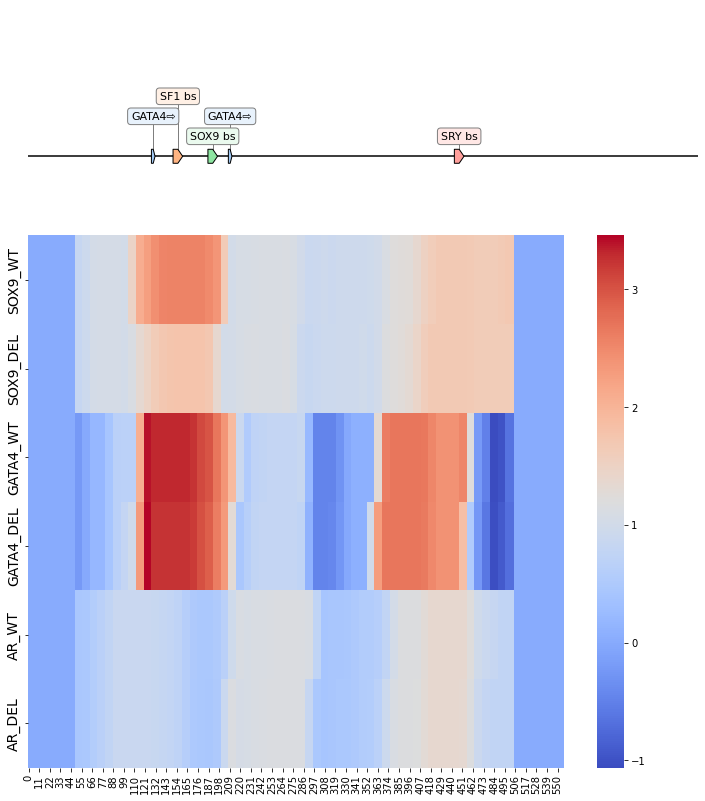

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14), sharex=True, gridspec_kw={"height_ratios": [0.3, 1]})
enh13.plot(ax=ax1, with_ruler=False, strand_in_label_threshold=4)
sns.heatmap(score_df, ax=ax2 ,cmap='coolwarm')
ax2.yaxis.set_tick_params(labelsize=14)